In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from umap import umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

/home/sofgqv/Documents/2023-2/ML/Labo3ML/virtualenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = "img/"

images = []
labels = []

for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta): 
        if archivo.endswith(".png"):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

ms_pca = MeanShift(bandwidth=1200, bin_seeding=True)
y_ms_pca = ms_pca.fit_predict(X_pca)
print(len(np.unique(y_ms_pca)))

10


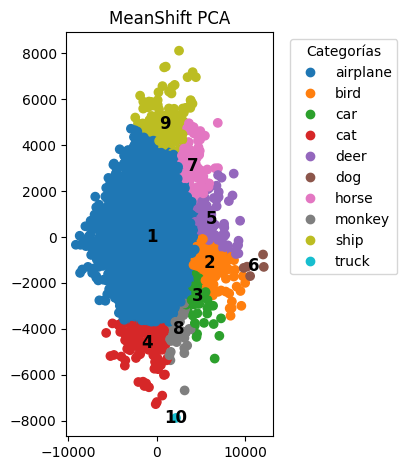

In [38]:
categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]

cluster_labels = [str(i) for i in range(1, len(np.unique(y_ms_pca)) + 1)]

plt.subplot(1, 2, 2)  # Use subplot position 2 for MeanShift clustering
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_ms_pca, cmap='tab10')
for i, label in enumerate(cluster_labels):
    plt.text(X_pca[y_ms_pca == i, 0].mean(), X_pca[y_ms_pca == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('MeanShift PCA')
legend_labels = [categories[int(label)] for label in cluster_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [17]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

ms_tsne = MeanShift(bandwidth=7, bin_seeding=True)
y_ms_tsne = ms_tsne.fit_predict(X_tsne)
print(len(np.unique(y_ms_tsne)))

10


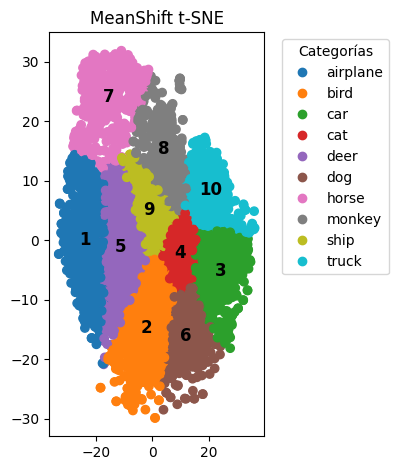

In [39]:
cluster_labels = [str(i) for i in range(1, len(np.unique(y_ms_tsne)) + 1)]

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_ms_tsne, cmap='tab10')
for i, label in enumerate(cluster_labels):
    plt.text(X_tsne[y_ms_tsne == i, 0].mean(), X_tsne[y_ms_tsne == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('MeanShift t-SNE')

legend_labels = [categories[int(label)] for label in cluster_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [21]:
#Embedding PCA
umap = UMAP.UMAP(n_components=2)
X_umap = umap.fit_transform(X)

pcaU = PCA(n_components=2)
X_pcaU = pcaU.fit_transform(X_umap)

ms_pcaU = MeanShift(bandwidth=0.85, bin_seeding=True)
y_ms_pcaU = ms_pcaU.fit_predict(X_pcaU)
print(len(np.unique(y_ms_pcaU)))

10


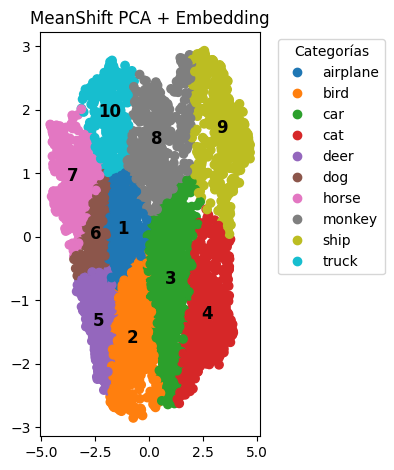

In [40]:
cluster_labels = [str(i) for i in range(1, len(np.unique(y_ms_pcaU)) + 1)]

plt.subplot(1, 2, 2)  # Use subplot position 2 for MeanShift clustering
scatter = plt.scatter(X_pcaU[:, 0], X_pcaU[:, 1], c=y_ms_pcaU, cmap='tab10')
for i, label in enumerate(cluster_labels):
    plt.text(X_pcaU[y_ms_pcaU == i, 0].mean(), X_pcaU[y_ms_pcaU == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('MeanShift PCA + Embedding')

legend_labels = [categories[int(label)] for label in cluster_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
#EMbedding t-SNE
umap = UMAP.UMAP(n_components=2)
X_umap = umap.fit_transform(X)

tsneE = TSNE(n_components=2, random_state=42, perplexity=700)
X_tsneE = tsneE.fit_transform(X_umap)

ms_tsneE = MeanShift(bandwidth=7, bin_seeding=True)
y_ms_tsneE = ms_tsneE.fit_predict(X_tsne)
print(len(np.unique(y_ms_tsneE)))

10


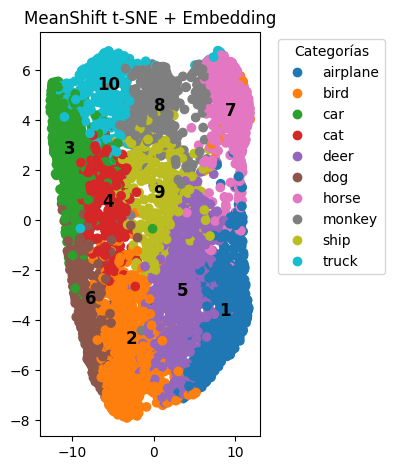

In [42]:
cluster_labels = [str(i) for i in range(1, len(np.unique(y_ms_tsneE)) + 1)]

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_tsneE[:, 0], X_tsneE[:, 1], c=y_ms_tsneE, cmap='tab10')
for i, label in enumerate(cluster_labels):
    plt.text(X_tsneE[y_ms_tsneE == i, 0].mean(), X_tsneE[y_ms_tsneE == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('MeanShift t-SNE + Embedding')

legend_labels = [categories[int(label)] for label in cluster_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()